In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.datasets import load_iris

In [65]:
data=load_iris()

NameError: name 'load_iris' is not defined

In [66]:
data

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]], shape=(442, 10)),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142.

In [67]:
x=data.data
y=data.target

In [68]:
data.DESCR

'.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n:Number of Instances: 442\n\n:Number of Attributes: First 10 columns are numeric predictive values\n\n:Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n:Attribute Information:\n    - age     age in years\n    - sex\n    - bmi     body mass index\n    - bp      average blood pressure\n    - s1      tc, total serum cholesterol\n    - s2      ldl, low-density lipoproteins\n    - s3      hdl, high-density lipoproteins\n    - s4      tch, total cholesterol / HDL\n    - s5      ltg, possibly log of serum triglycerides level\n    - s6      glu, blood sugar level\n\nNote: Each of thes

In [69]:
data.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [70]:
pd.DataFrame(x)

,0,1,2,3,4,5,6,7,8,9
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [73]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((331, 10), (111, 10), (331,), (111,))

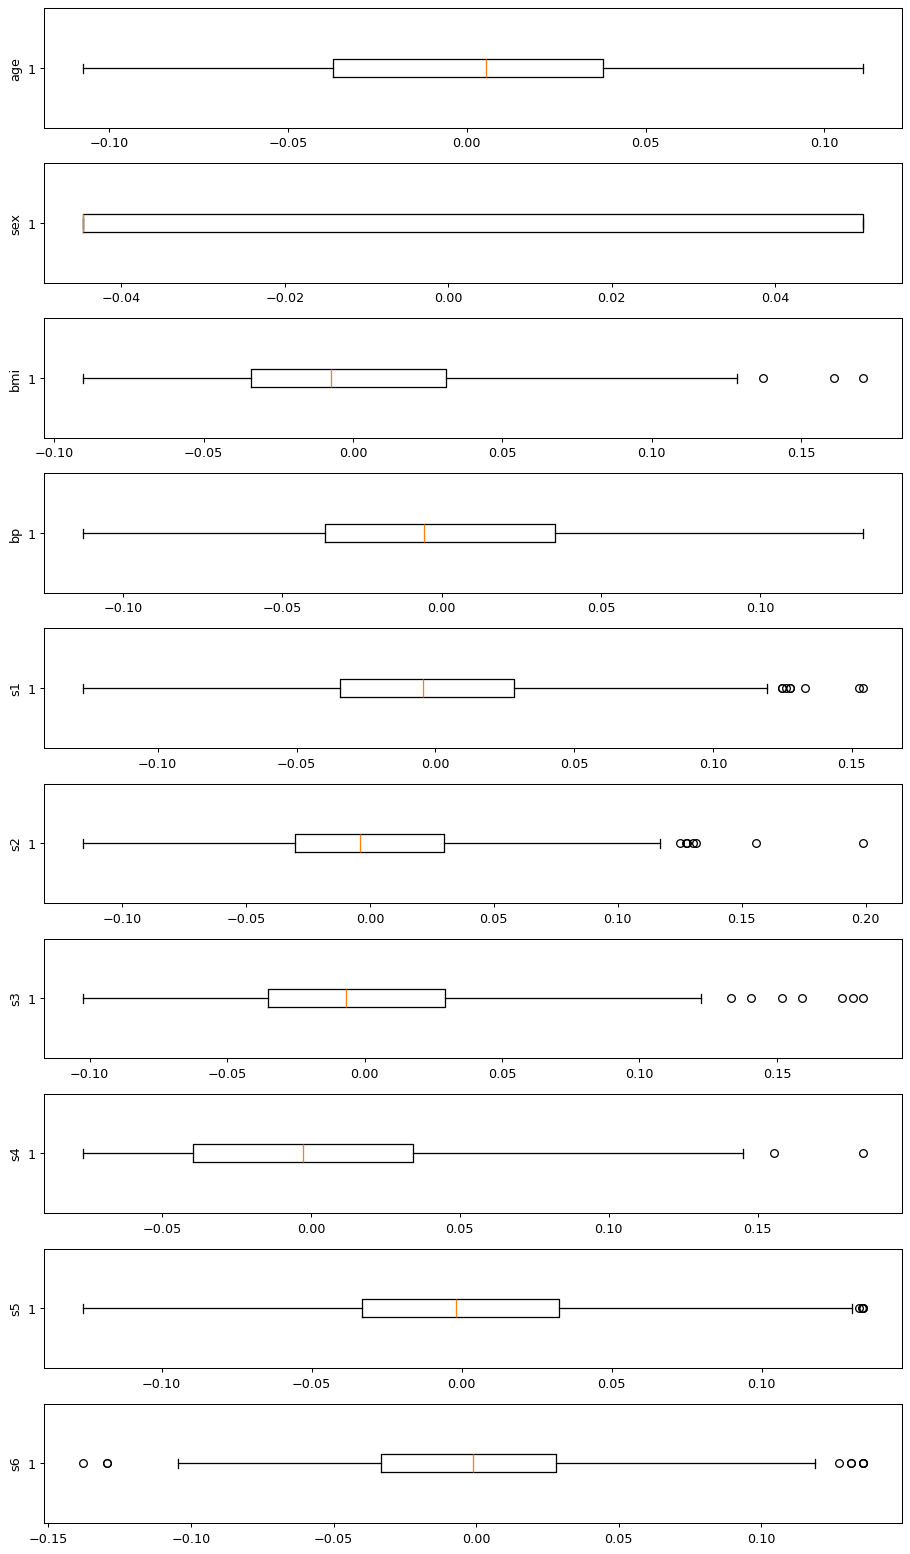

In [74]:
df = pd.DataFrame(data.data, columns=data.feature_names)

fig, axi = plt.subplots(len(df.columns), 1, figsize=(10, 17), dpi=92)
for i, col in enumerate(df.columns):
    axi[i].boxplot(df[col], vert=False)
    axi[i].set_ylabel(col)
plt.tight_layout()
plt.show()


In [75]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scale=scaler.fit_transform(X_train)
Y_train_scale=scaler.transform(X_test)

In [76]:
from sklearn.svm import SVC

In [77]:
clas=SVC()

In [78]:
clas.fit(X_train_scale,Y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [79]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
y_pred=clas.predict(X_test)
print(accuracy_score(y_pred,Y_test))
print(classification_report(y_pred,Y_test))
print(confusion_matrix(y_pred,Y_test))

0.009009009009009009
              precision    recall  f1-score   support

        37.0       0.00      0.00      0.00         0
        42.0       0.00      0.00      0.00         0
        48.0       0.00      0.00      0.00         0
        52.0       0.00      0.00      0.00         0
        53.0       0.00      0.00      0.00         0
        59.0       0.00      0.00      0.00         0
        60.0       0.00      0.00      0.00         0
        61.0       0.00      0.00      0.00         0
        63.0       0.00      0.00      0.00         0
        64.0       0.00      0.00      0.00         0
        65.0       0.00      0.00      0.00         0
        67.0       0.00      0.00      0.00         0
        68.0       0.00      0.00      0.00         0
        69.0       0.00      0.00      0.00         0
        70.0       0.00      0.00      0.00         0
        71.0       0.00      0.00      0.00         0
        72.0       0.00      0.00      0.00         0
      

In [80]:
from sklearn.model_selection import GridSearchCV

In [81]:
params = {
    'C': [0.01, 0.1, 1, 10, 100],        # numeric
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto'],           # scale or auto
    'verbose': [True, False]              # boolean
}

In [82]:
import warnings
warnings.filterwarnings('ignore')

In [83]:
grid = GridSearchCV(SVC(), param_grid=params, cv=5, verbose=2)
grid.fit(X_train, Y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[LibSVM][CV] END ...C=0.01, gamma=scale, kernel=linear, verbose=True; total time=   0.1s
[LibSVM][CV] END ...C=0.01, gamma=scale, kernel=linear, verbose=True; total time=   0.0s
[LibSVM][CV] END ...C=0.01, gamma=scale, kernel=linear, verbose=True; total time=   0.0s
[LibSVM][CV] END ...C=0.01, gamma=scale, kernel=linear, verbose=True; total time=   0.1s
[LibSVM][CV] END ...C=0.01, gamma=scale, kernel=linear, verbose=True; total time=   0.0s
[CV] END ..C=0.01, gamma=scale, kernel=linear, verbose=False; total time=   0.0s
[CV] END ..C=0.01, gamma=scale, kernel=linear, verbose=False; total time=   0.0s
[CV] END ..C=0.01, gamma=scale, kernel=linear, verbose=False; total time=   0.0s
[CV] END ..C=0.01, gamma=scale, kernel=linear, verbose=False; total time=   0.0s
[CV] END ..C=0.01, gamma=scale, kernel=linear, verbose=False; total time=   0.0s
[LibSVM][CV] END ......C=0.01, gamma=scale, kernel=rbf, verbose=True; total time=   0.0s

,estimator,SVC()
,param_grid,"{'C': [0.01, 0.1, ...], 'gamma': ['scale', 'auto'], 'kernel': ['linear', 'rbf', ...], 'verbose': [True, False]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,1


In [84]:
grid.best_estimator_

,C,1
,kernel,'poly'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,True


In [85]:
grid.best_params_

{'C': 1, 'gamma': 'scale', 'kernel': 'poly', 'verbose': True}

In [86]:
y_pred=grid.predict(Y_train_scale)

In [87]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
y_pred=clas.predict(Y_train_scale)
print(accuracy_score(y_pred,Y_test))
print(classification_report(y_pred,Y_test))
print(confusion_matrix(y_pred,Y_test))

0.009009009009009009
              precision    recall  f1-score   support

        37.0       0.00      0.00      0.00         0
        42.0       0.00      0.00      0.00         0
        48.0       0.00      0.00      0.00         0
        51.0       0.00      0.00      0.00         1
        52.0       0.00      0.00      0.00         0
        53.0       0.00      0.00      0.00         0
        55.0       0.00      0.00      0.00         5
        59.0       0.00      0.00      0.00         3
        60.0       0.00      0.00      0.00         0
        61.0       0.00      0.00      0.00         0
        63.0       0.00      0.00      0.00         0
        64.0       0.00      0.00      0.00         0
        65.0       0.00      0.00      0.00         3
        67.0       0.00      0.00      0.00         0
        68.0       0.00      0.00      0.00         0
        69.0       0.00      0.00      0.00         0
        70.0       0.00      0.00      0.00         0
      

In [88]:
from sklearn.naive_bayes import GaussianNB

In [90]:
gnd=GaussianNB()

In [92]:
gnd.fit(X_train_scale,Y_train)

,priors,None
,var_smoothing,1e-09


In [93]:
from sklearn.neighbors import KNeighborsClassifier

kNC=KNeighborsClassifier()

In [95]:
kNC.fit(X_train_scale,Y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [96]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
y_pred=kNC.predict(Y_train_scale)
print(accuracy_score(y_pred,Y_test))
print(classification_report(y_pred,Y_test))
print(confusion_matrix(y_pred,Y_test))

0.0
              precision    recall  f1-score   support

        25.0       0.00      0.00      0.00       3.0
        31.0       0.00      0.00      0.00       2.0
        37.0       0.00      0.00      0.00       0.0
        42.0       0.00      0.00      0.00       2.0
        44.0       0.00      0.00      0.00       3.0
        47.0       0.00      0.00      0.00       3.0
        48.0       0.00      0.00      0.00       0.0
        49.0       0.00      0.00      0.00       5.0
        51.0       0.00      0.00      0.00      11.0
        52.0       0.00      0.00      0.00       0.0
        53.0       0.00      0.00      0.00       3.0
        55.0       0.00      0.00      0.00       3.0
        57.0       0.00      0.00      0.00       1.0
        58.0       0.00      0.00      0.00       3.0
        59.0       0.00      0.00      0.00       7.0
        60.0       0.00      0.00      0.00       0.0
        61.0       0.00      0.00      0.00       2.0
        63.0       0.00